In [173]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [179]:
# def vogt_bound(T:int, d:int, xi:float, nu:float):
def vogt_bound(T, d, xi, nu):
    h = 1./T**xi
    bound = (np.log(T)**1/2)/(T**1/2  * h**((d+1)/2)) + 1./(T**nu * h**d) + h**2
    return bound 
def wass_bound(T, d, xi, nu, p): 
    h = 1. / T**xi
    bound = 1./(T**(1/2) * h**(d+1 +(nu-1)/p)) + 1./(T**nu * h**(d+nu-1)) + h
    return bound

# W.r.t T and fixed h

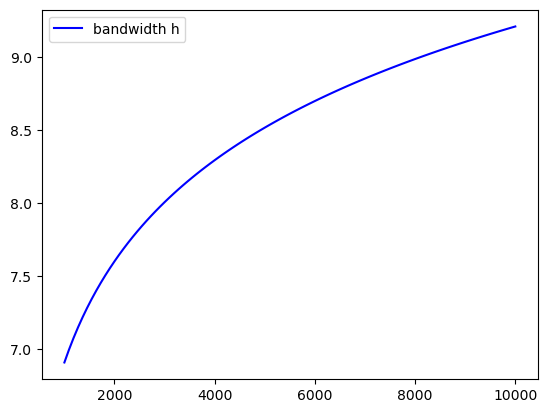

In [196]:
T = np.linspace(1000, 10000, 100).astype('int')
xi = 1/9
h = 1. / T**xi
plt.plot(T, h                                    , 'b', label='bandwidth h')
plt.legend()
plt.show()

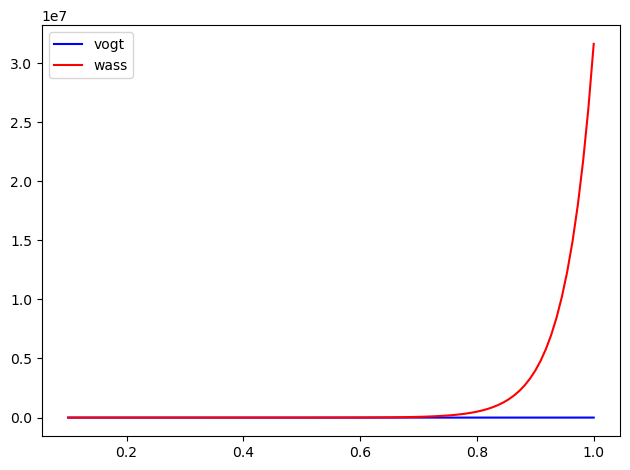

In [188]:
T = 1000
d = 2
nu = 1.
# xi = 1/2 # h = T ** (-xi)
p = 3
xi = np.linspace(0.1, 1., 100)
vogt = vogt_bound(T, d, xi, nu)
wass = wass_bound(T, d, xi, nu, p)
plt.plot(xi, vogt, color='blue', label='vogt')
plt.plot(xi, wass, color='red', label='wass')
# plt.yscale('log')
# plt.plot(T, abs(wass-vogt), color='green', label='diff')
plt.legend()
plt.tight_layout()
plt.show()

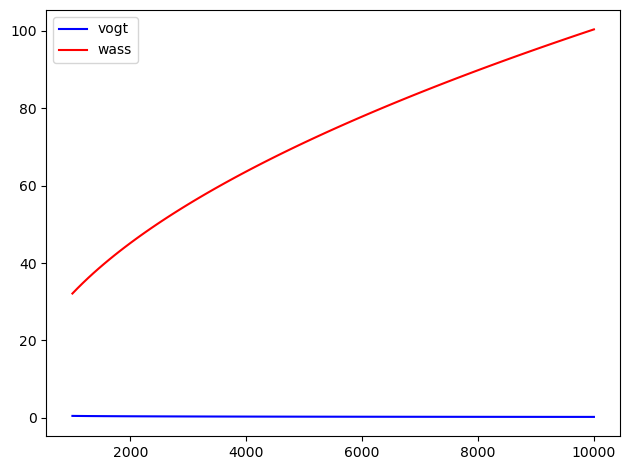

In [195]:
xi = 1/5
nu = 1
p = 3
d = 4
T = np.linspace(1000, 10000, 100).astype('int')
vogt = vogt_bound(T, d, xi, nu)
wass = wass_bound(T, d, xi, nu, p)
plt.plot(T, vogt, color='blue', label='vogt')
plt.plot(T, wass, color='red', label='wass')
# plt.yscale("log")
# plt.plot(T, abs(wass-vogt), color='green', label='diff')
plt.legend()
plt.tight_layout()
plt.show()

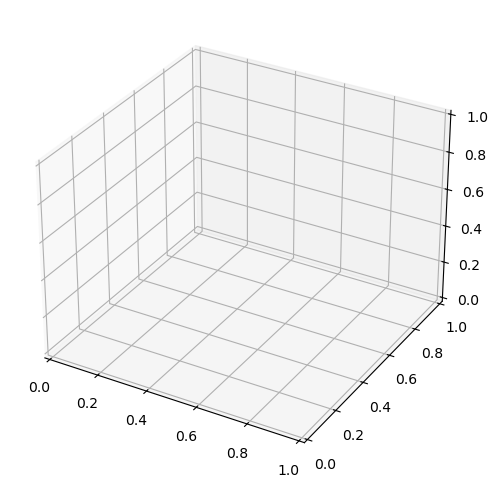

interactive(children=(IntSlider(value=50050, description='T', max=100000, min=100), FloatSlider(value=0.505, d…

In [178]:

# T = np.linspace(1000, 100000, 100).astype('int')
# nu = np.linspace(0.1, 1., 100).astype('int')

T, nu = np.meshgrid(T, nu) 
xi = 1/2
h = T ** (-xi)
nu = 0.1
p = 3
d = 3
@interact(T=(100, 100000), nu=(0.01, 1))

def plot(T, nu):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 6))
    surf = ax.plot_trisurf(T.flat, nu.flat, wass_bound(T, d, T**(-1/2), nu, p).flat, cmap='coolwarm')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    ax.view_init(elev=30, azim=160)
    plt.show()
    return